<a href="https://colab.research.google.com/github/Aryanupadhyay23/Deep-Learning-/blob/main/Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import time

In [56]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [57]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
df = df[['Age','EstimatedSalary','Purchased']]

In [59]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [60]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [61]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [63]:
X_scaled.shape

(400, 2)

In [64]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
#X_train.shape

In [66]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [67]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=400,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8062 - loss: 0.6102 - val_accuracy: 0.7500 - val_loss: 0.6345
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8125 - loss: 0.6021 - val_accuracy: 0.7500 - val_loss: 0.6301
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.8125 - loss: 0.5962 - val_accuracy: 0.7500 - val_loss: 0.6263
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.8156 - loss: 0.5913 - val_accuracy: 0.7500 - val_loss: 0.6230
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.8156 - loss: 0.5870 - val_accuracy: 0.7625 - val_loss: 0.6200
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8219 - loss: 0.5831 - val_accuracy: 0.7875 - val_loss: 0.6171
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8281 - loss: 0.5794 - val_accuracy: 0.7875 - val_loss: 0.6143
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8313 - loss: 0.5759 - val_accuracy: 0.7875 - val_loss: 0.

In [70]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8600 - loss: 0.4749 - val_accuracy: 0.7875 - val_loss: 0.4978
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8560 - loss: 0.3053 - val_accuracy: 0.8125 - val_loss: 0.4294
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9044 - loss: 0.2505 - val_accuracy: 0.8125 - val_loss: 0.3949
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8587 - loss: 0.3120 - val_accuracy: 0.8125 - val_loss: 0.3719
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.2581 - val_accuracy: 0.8875 - val_loss: 0.3374
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8934 - loss: 0.2638 - val_accuracy: 0.9000 - val_loss: 0.3185
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8424 - loss: 0.3124 - val_accuracy: 0.9250 - val_loss: 0.3001
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - loss: 0.2618 - val_accuracy: 0.

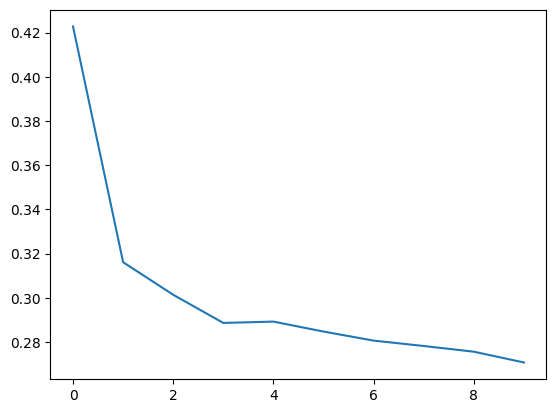

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [72]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.2871 - loss: 0.7355 - val_accuracy: 0.6375 - val_loss: 0.5073
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3063 - loss: 0.7210 - val_accuracy: 0.6625 - val_loss: 0.5063
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3731 - loss: 0.7042 - val_accuracy: 0.6875 - val_loss: 0.5073
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4368 - loss: 0.7030 - val_accuracy: 0.6875 - val_loss: 0.5065
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4588 - loss: 0.6937 - val_accuracy: 0.7000 - val_loss: 0.5059
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4767 - loss: 0.6868 - val_accuracy: 0.7000 - val_loss: 0.5057
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4850 - loss: 0.6827 - val_accuracy: 0.7000 - val_loss: 0.5052
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5004 - loss: 0.6731 - val_accuracy: 0.7500 - val_loss: 0.5057

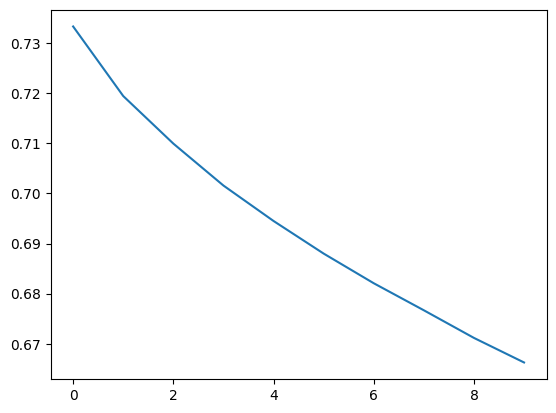

In [74]:
plt.plot(history.history['loss'])